<center>
<h1> Introduction to Seismic Inversion </h1>
<h2> Determination of impedences in a two layer Earth model using Bayes Theorem </h2>
<h3> Russel Wilcox-Cline </h3>
</center>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec #Used for organizing figures
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

<h3> Description of Problem </h3>

<p> Let us consider a two layer model consisting of a layer of ice and a layer of solid rock, as shown below.

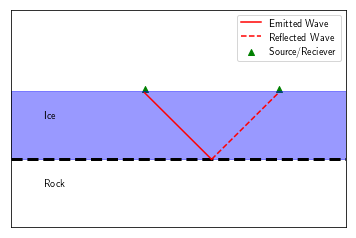

In [2]:
interface = 0.5

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(interface, color = 'k', linewidth = 3, linestyle = '--')
ax.axhspan(1, interface, alpha=0.4, color='blue')
ax.set_ylim([0, 1.6])
ax.set_xlim([0, 1])
ax.plot([0.4, 0.6], [0.99, 0.5], linestyle = '-', color = 'r', label = 'Emitted Wave')
ax.plot([0.6, 0.8], [0.5, 0.99], linestyle = '--', color = 'r', label = 'Reflected Wave')
ax.scatter([0.4, 0.8], [1.02, 1.02], marker = '^', color = 'green', label = 'Source/Reciever')
ax.legend(loc = 0)
ax.text(.1, .8, 'Ice', fontweight='bold')
ax.text(.1, .3, 'Rock', fontweight='bold')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

<p> From basic seismology we know that the amplitude ratio between an emitted and reflected wave is given by $\frac{A_{R}}{A_{0}} = \frac{Z_{rock}-Z_{ice}}{Z_{rock}+Z_{ice}}$, where the impedance $Z$ relates the density of the material to the velocity of the wave such that $Z = \rho v$. Let us assume that a seismic wave is generated with known amplitude $A_{0}$ and the reciever records the reflected seismic wave with amplitude $\bar{A}_{R} \pm \sigma_{R}$. Let us also assume that that the uncertainty on $\bar{A}_{R}$ is Gaussian such that the likelihood of recording a reflection with amplitude $A_{R}$ is given by: $$f_{data}(A_{R}) = \frac{1}{\sqrt{2\pi}\sigma_{R}}\exp(-\frac{(\bar{A}_{R}-A_{R})^{2}}{2\sigma^{2}_{R}})$$ </p>

<p> Our goal is to determine both $Z_{rock}$ and $Z_{ice}$. 

<h3> Estimation of Impedances </h3>

<p> Our goal is to determine a set of posterior distributions for both $Z_{rock}$ and $Z_{ice}$, given by $P(\vec{Z}|A_{R})$ . Let us realize that we already know the distribution of the observed reflected amplitude as a function of the impedances. We can rewrite $f_{data}(A_{R})$ as a conditional probability distribution $P(A_{R}|Z)$ because $A_{R}$ is a function of $Z$. Thus the prior distribtution can be written as $$f_{prior}(A_{R}|Z) = \frac{1}{\sqrt{2\pi}\sigma_{R}}\exp(-\frac{(\bar{A}_{R}-\frac{Z_{rock}-Z_{ice}}{Z_{rock}+Z_{ice}}A_{0})^{2}}{2\sigma^{2}_{R}})$$ </p>

<p> Let us assume that the amplitude of the emitted wave is $A_{0} = 1.2$ and the measured amplitude of the reflected wave is given by $\bar{A_{R}} = 0.7 \pm 0.1$. </p> Using these values, the prior PDF is plotted below. </p>

In [3]:
dz = 0.02
Z_rock = np.arange(0.02, 5+dz, dz)
Z_ice = np.arange(0.02, 5+dz, dz)
ZZ_r, ZZ_i = np.meshgrid(Z_ice, Z_rock)
A_mean_r = 0.7
sigma_r = 0.1
A_0 = 1.2
fprior = 1/(np.sqrt(2*np.pi)*sigma_r)*np.exp(-(A_mean_r-A_0*(ZZ_r-ZZ_i)/(ZZ_r+ZZ_i))**2/(2*sigma_r**2))



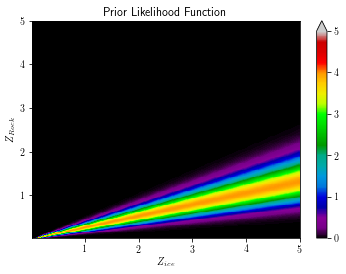

In [4]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
pcm = ax1.pcolor(ZZ_r, ZZ_i, fprior, vmin=0, vmax=5, cmap = 'nipy_spectral')
ax1.set_xlabel( r'$Z_{ice}$')
ax1.set_ylabel(r'$Z_{Rock}$')
ax1.set_title('Prior Likelihood Function')
fig1.colorbar(pcm, extend='max')
plt.show()


<p> Recall that we can relate a posterior distribution to a prior distribution using Bayes Theorem; therefore we can state

$$P_{post}(Z|A_{R}) = \frac{P_{prior}(A_{R}|Z)*P(Z)}{P(A_{R})} \propto P_{prior}(A_{R}|Z)*P(Z)$$ 

Note that the denominator can be dropped because it is just a normalizing factor. Assuming that the impedances of rock and ice are independent we can write the joint probability density function of the impedances as a product given by $f(\vec{Z}) = f(Z_{rock})*f(Z_{ice})$ and that the PDF's for both materials are given by a Weibull PDF, with different parameterizations A and B. Let the PDF of $Z_{rock}$ be parameterized by $A = 3$ and $B = 3.8$ and let the PDF of $Z_{ice}$ be parameterized by $A = 2.1$ and $B = 4.0$, which are shown below.



In [5]:
def weib(x,n,a):
    
    w =  (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)
    
    return w


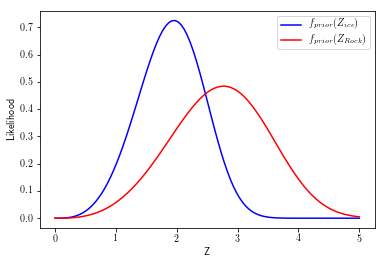

In [6]:
x = np.linspace(0, 5, 100)
pdf_ice = weib(x, 2.1, 4)
pdf_rock = weib(x, 3, 3.8)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pdf_ice, color = 'blue', label = r'$f_{prior}(Z_{ice})$')
ax.plot(x, pdf_rock, color = 'red', label = r'$f_{prior}(Z_{Rock})$')
ax.legend(loc = 0)
ax.set_ylabel('Likelihood')
ax.set_xlabel('Z')
plt.show()

<p> Applying the marginal PDF's for the impedances of ice and rock to Bayes Theorem we can generate a posterior distribution for posterior, which is shown below. </p>

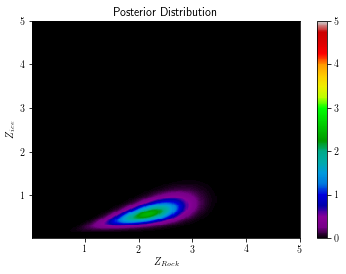

In [7]:
PZ_rock = weib(Z_rock, 3, 3.8)
PZ_ice = weib(Z_rock, 2.1, 4)
fmarg = PZ_rock*PZ_ice
fpost = fprior*PZ_rock*PZ_ice
fpost = fpost/(np.sum(fpost)*dz*dz)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
pcm = ax1.pcolor(ZZ_r, ZZ_i, fpost, vmin=0, vmax=5, cmap = 'nipy_spectral')
ax1.set_xlabel(r'$Z_{Rock}$')
ax1.set_ylabel(r'$Z_{ice}$')
ax1.set_title('Posterior Distribution')
fig1.colorbar(pcm)
plt.show()



In [8]:
max_loc = np.where(fpost == np.max(fpost))
max_Z_rock = ZZ_r[max_loc]
max_Z_ice = ZZ_i[max_loc]
pred_A = (max_Z_rock-max_Z_ice)/(max_Z_rock+max_Z_ice)*A_0

<h3> Discussion </h3>

<p> If we were just to consider the prior distribution of the observed reflected amplitudes we would see that the problem is over determined. In this case there were no restrictions on the impendances, other than bounded values, thus reducing Bayes Theorem to

$$f_{post}(\vec{Z}|A) = kf_{prior}(A_{R}|\vec{Z})$$

where $k$ is a normalization constant. Therefore values of $Z_{ice}$ and $Z_{rock}$ cannot be uniquely determined and  a line of highest likelihood is observed in model space. 

<p> When adding in the marginal distributions for the impedances we are able to further constrain the system, therefore allowing us to determine a unique maximum likelihood value from the posterior distribution, which was found to be $(Z_{Rock} = 2.2, Z_{ice} = 0.58)$. Recall the observed value of the reflected wave was found to be $\bar{A_{R}} = 0.7 \pm 0.1$. The estimated value was determined to be $A_{Rest} = 0.6992$, which is well within one standard devation of the observation.